---
###  Step-by-Step PCA with **Code + Intuition** with the Iris Dataset
- 150 samples of flowers
- 4 features: *sepal length, sepal width, petal length, petal width*
- 3 classes: *setosa, versicolor, virginica*

---



---

### **Step 1: Load the Dataset**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

### **Step 2: Standardize the Data**

PCA is affected by the scale of features, so we standardize:

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Step 3: Covariance Matrix**

We calculate how features vary with each other.

In [17]:
import numpy as np

cov_matrix = np.cov(X_scaled.T)  # Transpose because np.cov expects features as rows
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### **Step 4: Eigenvalues & Eigenvectors**

These tell us the "directions" (components) and how much "information" (variance) they hold.

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen values: \n',eigenvalues)
print('\nEigen Vectors: \n', eigenvectors)

Eigen values: 
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigen Vectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### **Step 5: Sort Eigenvectors by Eigenvalues**

We sort in descending order to keep the most informative components.

In [37]:
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

sorted_idx
eigenvalues
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

### **Step 6: Choose Top K Components (e.g., 2)**

We'll reduce to 2D for visualization.

In [42]:
k = 2
eigenvectors_subset = eigenvectors[:, :k]

eigenvectors_subset

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

### **Step 7: Transform Data (Project onto New Axes)**

In [ ]:
X_reduced = X_scaled.dot(eigenvectors_subset)
X_reduced

### **Step 8: Plot the 2D Data**

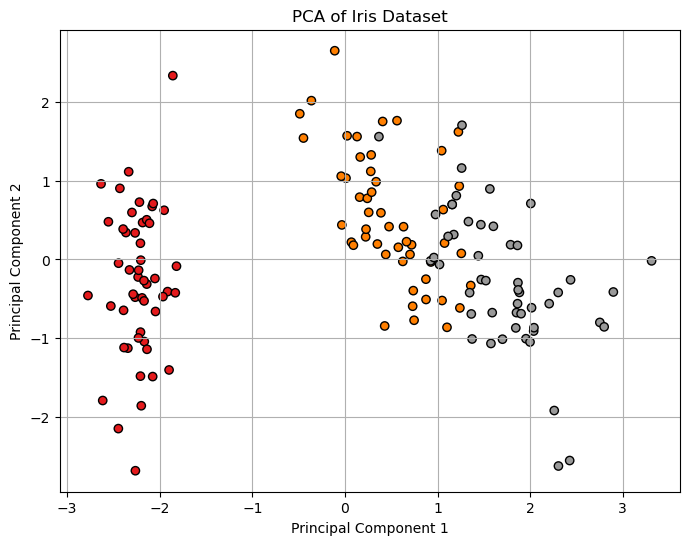

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Set1', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.grid(True)
plt.show()